# kNN

для курса "Введение в машинное обучение" https://github.com/Dyakonov/IML

автор: Александр Дьяконов https://dyakonov.org/ag/

In [31]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


# Служебные функции

In [95]:
def show_scatter(f, g, y, size=20, figsize=(5, 4.5), eps=0.2, random=True,
                 xlabel='признак 1', ylabel='признак 2', lims=None, newfig=True,
                class1 = 'класс 1', class0='класс 0', show_legend=True):
    '''
    построить диаграмму рассеивания
    f, g - признаки
    y - класс (0 bkb 1)
    '''
    if newfig:
        fg = plt.figure(figsize=figsize)
    if random:
        # для легенды
        plt.scatter([], [], size, c='#000099', label=class1, edgecolors='white', linewidth=0.8)
        plt.scatter([], [], size, marker='s', c='#FF9999', label=class0, edgecolors='black', linewidth=0.5)
        for i in range(len(y)):
            if y[i]>0:
                plt.scatter([f[i]], [g[i]], size, c='#000099', edgecolors='white', linewidth=0.8)
            else:
                plt.scatter([f[i]], [g[i]], size, marker='s', c='#FF9999', edgecolors='black', linewidth=0.5)
                
    else:
        plt.scatter(f[y > 0], g[y > 0], size, c='#000099', label=class1, edgecolors='white', linewidth=0.8)
        plt.scatter(f[y <= 0], g[y <=0 ], size, marker='s', c='#FF9999', label=class0, edgecolors='black', linewidth=0.5)
    # plt.plot([],[],'k', label='модель')
    if lims is None:
        plt.xlim([min(f) - eps, max(f) + eps])
        plt.ylim([min(g) - eps, max(g) + eps])
    else:
        plt.xlim(lims[0])
        plt.ylim(lims[1])
    if show_legend:
        plt.legend(loc=(1,0))
    plt.grid(lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if newfig:
        return fg
    
    
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        try:
            decision_values = classifier.predict_proba(X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        c = decision_values.reshape(X1.shape)
        if twocolor:
            print (fill_levels)
            ax.contourf(X1, X2, c,
                        levels=fill_levels, colors=['#FF9999', '#0000FF'], alpha=0.2)
            ax.contour(X1, X2, c,
                       levels=np.linspace(c.min(), c.max(), 15), alpha=0.5, colors="white")             
            
        else:
            ax.contourf(X1, X2, c,
                        levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)
#         ax.contour(X1, X2, c,
#                     levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")        

    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())    

# модельная задача и решение

In [9]:
def gen_data(n_train=100, n_test=1001, e_error=0.5, random_seed=40):
    """
    данные для одномерной
    задачи регрессии
    """
    np.random.seed(random_seed)
    x = np.random.rand(n_train)
    e = e_error * np.random.rand(n_train)
    y = 2 * (x - 0.6) ** 2 + x + e
    
    x2 = np.linspace(0, 1, n_test)
    y2 = 2 * (x2 - 0.6) ** 2 + x2
    
    return (x, y, x2, y2)

x_train, y_train, x_test, y_test = gen_data(n_train=10)

# обучение модели

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=1) # kNN-регрессия
# обучение
model.fit(x_train[:, np.newaxis], y_train)
# обратите внимание: np.newaxis
# контроль
a_train = model.predict(x_train[:, np.newaxis])
a_test = model.predict(x_test[:, np.newaxis])

# визуализация

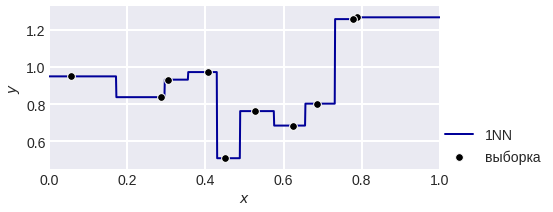

In [15]:
#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(7, 3))

plt.grid(lw=2)
plt.plot(x_test, a_test,
         lw=2, color='#000099', label='1NN', zorder=2)

# plot([], [],
#      c='#FF9999', lw=3, label='ошибка')
# for t in range(len(x_train)):
#     ma = min([a_train[t], y_train[t]]) + 0.01
#     mb = max([a_train[t], y_train[t]]) - 0.01
#     plot([x_train[t], x_train[t]],
#          [ma, mb], c='#FF9999', lw=3, zorder=1)
    
plt.scatter(x_train, y_train,
            60, color='k', label='выборка', zorder=3, edgecolors='white', linewidth=1.0)
plt.legend(loc=(1, 0))
plt.xlim([-0.0, 1.0])
#plt.ylim([-1.0, 1.0])
plt.xlabel('$x$');
plt.ylabel('$y$');

# 3 NN

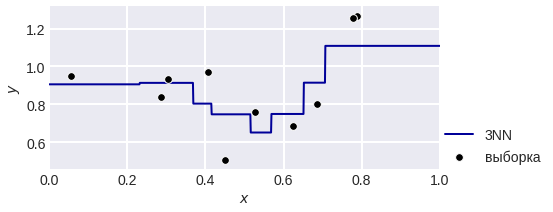

In [17]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3) # kNN-регрессия
# обучение
model.fit(x_train[:, np.newaxis], y_train)
# обратите внимание: np.newaxis
# контроль
a_train = model.predict(x_train[:, np.newaxis])
a_test = model.predict(x_test[:, np.newaxis])


plt.figure(figsize=(7, 3))

plt.grid(lw=2)
plt.plot(x_test, a_test,
         lw=2, color='#000099', label='3NN', zorder=2)

    
plt.scatter(x_train, y_train,
            60, color='k', label='выборка', zorder=3, edgecolors='white', linewidth=1.0)
plt.legend(loc=(1, 0))
plt.xlim([-0.0, 1.0])
#plt.ylim([-1.0, 1.0])
plt.xlabel('$x$');
plt.ylabel('$y$');

# много моделей

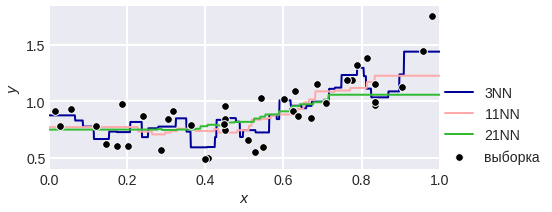

In [21]:
x_train, y_train, x_test, y_test = gen_data(n_train=40)

from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=3),
          KNeighborsRegressor(n_neighbors=11),
          KNeighborsRegressor(n_neighbors=21)]

a_trains = []
a_tests = []

for model in models:
    # обучение
    model.fit(x_train[:, np.newaxis], y_train)
    # обратите внимание: np.newaxis
    # контроль
    a_trains.append(model.predict(x_train[:, np.newaxis]))
    a_tests.append(model.predict(x_test[:, np.newaxis]))


plt.figure(figsize=(7, 3))

plt.grid(lw=2)
plt.plot(x_test, a_tests[0],
         lw=2, color='#000099', label='3NN', zorder=2)
plt.plot(x_test, a_tests[1],
         lw=2, color='#FFAAAA', label='11NN', zorder=2)
plt.plot(x_test, a_tests[2],
         lw=2, color='#33BB33', label='21NN', zorder=2)

    
plt.scatter(x_train, y_train,
            60, color='k', label='выборка', zorder=3, edgecolors='white', linewidth=1.0)
plt.legend(loc=(1, 0))
plt.xlim([-0.0, 1.0])
#plt.ylim([-1.0, 1.0])
plt.xlabel('$x$');
plt.ylabel('$y$');
    

# задача классификации

In [77]:
from sklearn.datasets import make_blobs

seed = 10
n_data = 200
n_centers = 2

X, y = make_blobs(n_samples=n_data, n_features=2,
                                centers=n_centers, random_state=seed,
                                cluster_std=5)

X += 3

(-20, 20)

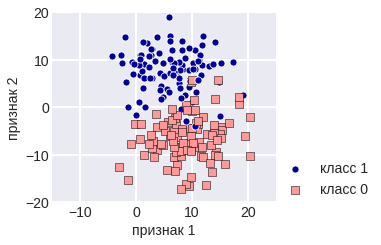

In [78]:
show_scatter(X[:, 0], X[: ,1], y, figsize=(4, 3.5), size=50, eps=1.0);
plt.xlim([-15, 25])
plt.ylim([-20, 20])

In [79]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
model = NearestCentroid()
model.fit(X, y)


NearestCentroid(metric='euclidean', shrink_threshold=None)

[0, 0.5, 1]


(-20, 20)

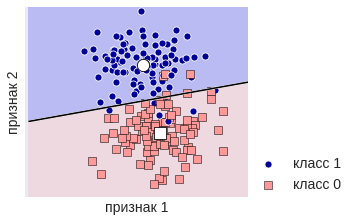

In [90]:
plt.figure(figsize=(4, 3.5))
plot_2d_separator(model, X, twocolor=True, fill=True, eps=10, line=True)
show_scatter(X[:, 0], X[: ,1], y, figsize=(4, 3.5), size=50, eps=1.0, newfig=False);
plt.scatter(model.centroids_[:1, 0], model.centroids_[:1, 1], 150, [0], marker='s', edgecolors='black', linewidth=0.8)
plt.scatter(model.centroids_[1:, 0], model.centroids_[1:, 1], 150, [1], edgecolors='black', linewidth=0.8)
#show_scatter(model.centroids_[:, 0], model.centroids_[: ,1], [0, 1], figsize=(4, 3.5), size=100, eps=1.0, newfig=False);
plt.xlim([-15, 25])
plt.ylim([-20, 20])

[0, 0.5, 1]


(-20, 20)

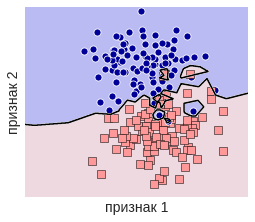

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

plt.figure(figsize=(4, 3.5))
plot_2d_separator(model, X, twocolor=True, fill=True, eps=12, line=True)
show_scatter(X[:, 0], X[: ,1], y, figsize=(4, 3.5),
             size=50, eps=1.0, newfig=False, show_legend=False);
#plt.scatter(model.centroids_[:1, 0], model.centroids_[:1, 1], 150, [0], marker='s', edgecolors='black', linewidth=0.8)
#plt.scatter(model.centroids_[1:, 0], model.centroids_[1:, 1], 150, [1], edgecolors='black', linewidth=0.8)
#show_scatter(model.centroids_[:, 0], model.centroids_[: ,1], [0, 1], figsize=(4, 3.5), size=100, eps=1.0, newfig=False);
plt.xlim([-15, 25])
plt.ylim([-20, 20])

[0, 0.5, 1]


(-20, 20)

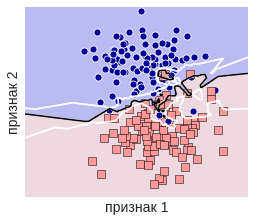

In [97]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

plt.figure(figsize=(4, 3.5))
plot_2d_separator(model, X, twocolor=True, fill=True, eps=12, line=True)
show_scatter(X[:, 0], X[: ,1], y, figsize=(4, 3.5),
             size=50, eps=1.0, newfig=False, show_legend=False);
#plt.scatter(model.centroids_[:1, 0], model.centroids_[:1, 1], 150, [0], marker='s', edgecolors='black', linewidth=0.8)
#plt.scatter(model.centroids_[1:, 0], model.centroids_[1:, 1], 150, [1], edgecolors='black', linewidth=0.8)
#show_scatter(model.centroids_[:, 0], model.centroids_[: ,1], [0, 1], figsize=(4, 3.5), size=100, eps=1.0, newfig=False);
plt.xlim([-15, 25])
plt.ylim([-20, 20])

[0, 0.5, 1]


(-20, 20)

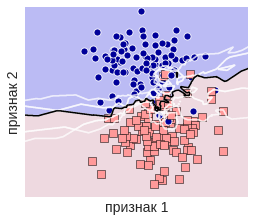

In [98]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

plt.figure(figsize=(4, 3.5))
plot_2d_separator(model, X, twocolor=True, fill=True, eps=12, line=True)
show_scatter(X[:, 0], X[: ,1], y, figsize=(4, 3.5),
             size=50, eps=1.0, newfig=False, show_legend=False);
#plt.scatter(model.centroids_[:1, 0], model.centroids_[:1, 1], 150, [0], marker='s', edgecolors='black', linewidth=0.8)
#plt.scatter(model.centroids_[1:, 0], model.centroids_[1:, 1], 150, [1], edgecolors='black', linewidth=0.8)
#show_scatter(model.centroids_[:, 0], model.centroids_[: ,1], [0, 1], figsize=(4, 3.5), size=100, eps=1.0, newfig=False);
plt.xlim([-15, 25])
plt.ylim([-20, 20])

# 2do

In [ ]:
>>> X = [[0], [3], [1]]
>>>
>>> neigh = NearestNeighbors(n_neighbors=2)
>>> neigh.fit(X) 
NearestNeighbors(algorithm='auto', leaf_size=30, ...)
>>> A = neigh.kneighbors_graph(X)
>>> A.toarray()